## Load the data and remove duplicates

In [1]:
import json
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('full_data.csv')

In [3]:
data.shape

(76000, 171)

In [4]:
data.isnull().sum()

class         0
aa_000        0
ab_000    58692
ac_000     4261
ad_000    18842
          ...  
ee_007      863
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
Length: 171, dtype: int64

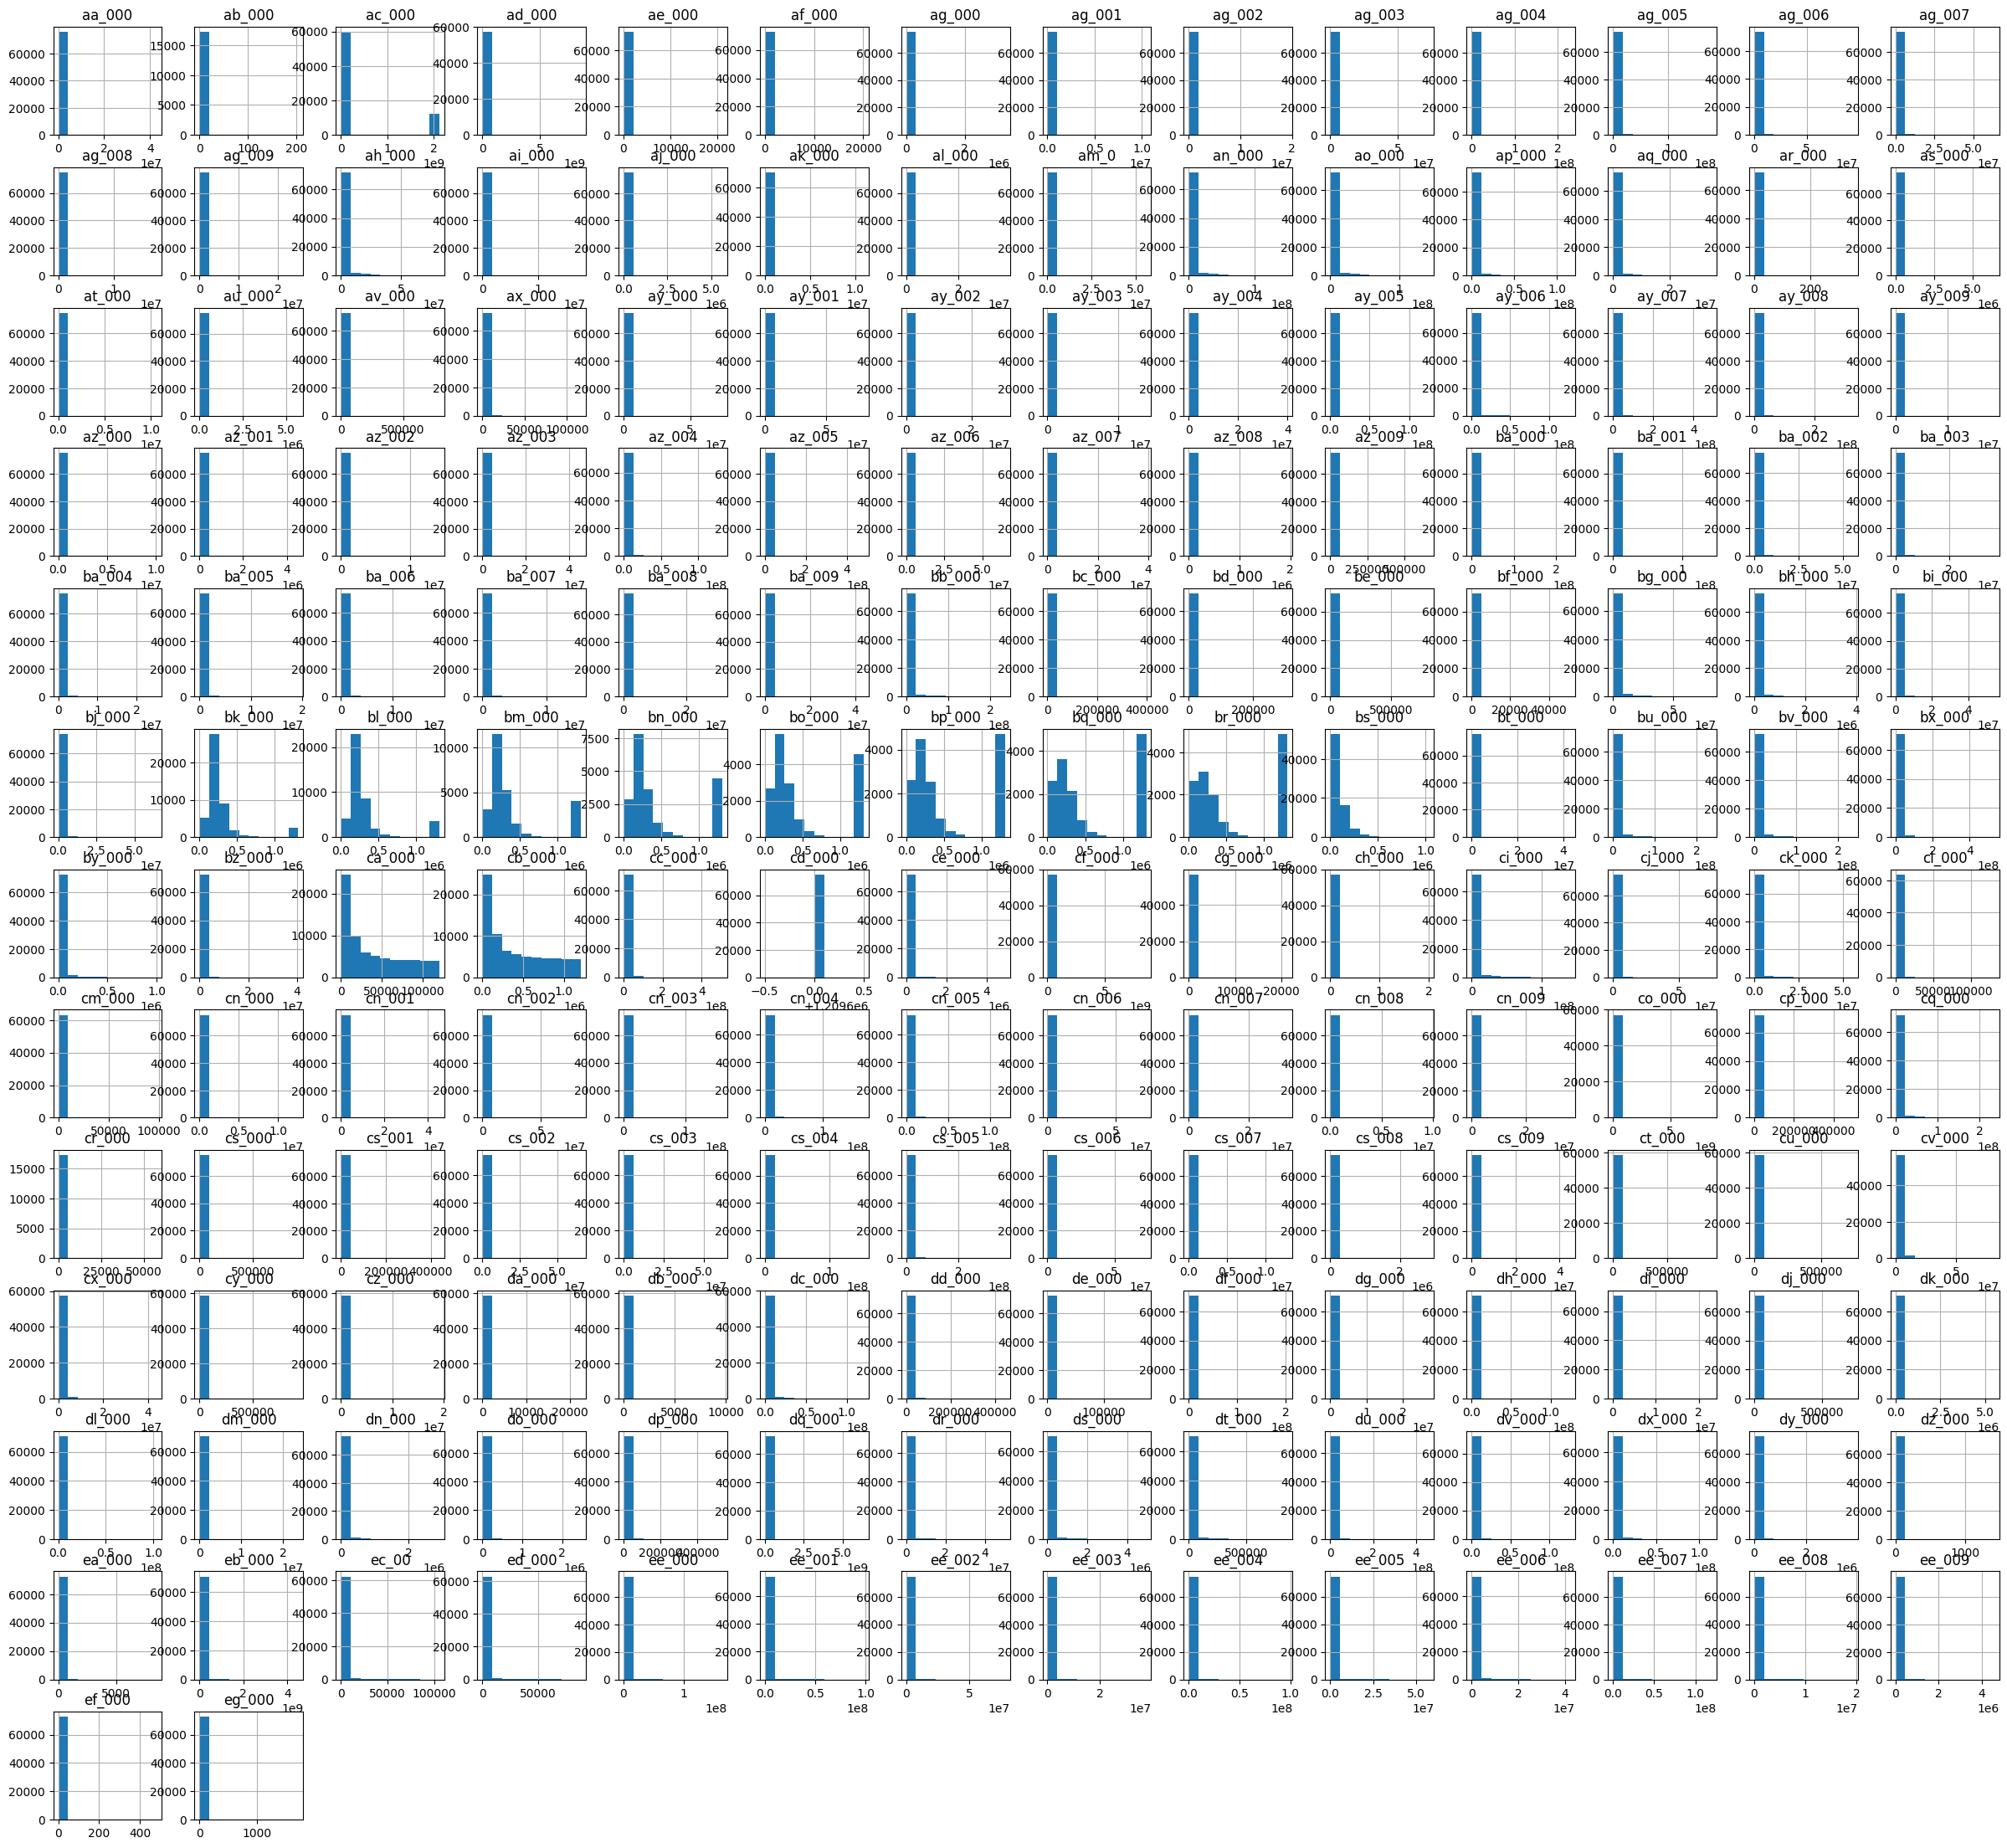

In [6]:
data.hist(figsize=(30, 30), layout=(14, 14))

### Create training, validation and holdout sets

In [13]:
outdir = Path('.')
outdir.mkdir(exist_ok=True)

n_splits = 10
n_folds = 5
idx = np.arange(len(data))

kf_splits = KFold(n_splits=n_splits, random_state=1896, shuffle=True)

for holdout_num, out_split in enumerate(kf_splits.split(idx)):
    idx_train = idx[out_split[0]]
    idx_test = idx[out_split[1]]
    devel_fold = data.iloc[idx_train, ]
    test_fold = data.iloc[idx_test, ]

    test_fold.to_csv(outdir / f'holdout_{holdout_num}.csv', index=False)

    kf_folds = KFold(n_splits=n_folds, random_state=165782 * holdout_num, shuffle=True)
    idx_folds = np.arange(len(devel_fold))
    for fold_num, idx_fold_split in enumerate(kf_folds.split(idx_folds)):
        train_fold = devel_fold.iloc[idx_fold_split[0]]
        val_fold = devel_fold.iloc[idx_fold_split[1]]
        train_fold.to_csv(outdir / f'devel_{holdout_num}_train_{fold_num}.csv', index=False)
        val_fold.to_csv(outdir / f'devel_{holdout_num}_val_{fold_num}.csv', index=False)